# The Sparks Foundation-GRIP August 2021

# TASK2 - Prediction using Unsupervised ML

# Author: K.Manoj

# Importing required libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Importing Dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Creating the Data Frame

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
target_df=pd.DataFrame(iris.target,columns=['target'])

# Pre-Processing our Data Set

In [4]:
#shape of the data
iris_df.shape

(150, 4)

In [5]:
#info about our data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.duplicated().sum()

1

In [11]:
iris_df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Plotting the data before clustering

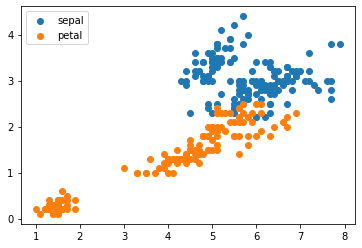

In [12]:
#plotting the scatter plot
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],label='sepal')
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'],label='petal')
plt.legend()

# Finding the optimum number of clusters for k-means classification

In [13]:
from sklearn.cluster import KMeans
k=range(1,10)
wcss=[]
for i in k:
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(iris_df)
    wcss.append(km.inertia_)

In [14]:
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049]

# Elbow Method

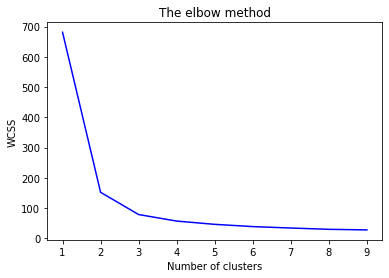

In [15]:
#Plotting the elbow curve
plt.plot(k,wcss,c='blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Creating the K-Means classifier

In [16]:
km=KMeans(n_clusters=3,init='k-means++',random_state=0)
y=km.fit_predict(iris_df)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Centroids

In [17]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [18]:
#Adding a new column to the dataframe
iris_df['cluster']=y

In [19]:
#splitting the clusters 
df1=iris_df[iris_df.cluster==0]
df2=iris_df[iris_df.cluster==1]
df3=iris_df[iris_df.cluster==2]

# Visualizing the Clusters

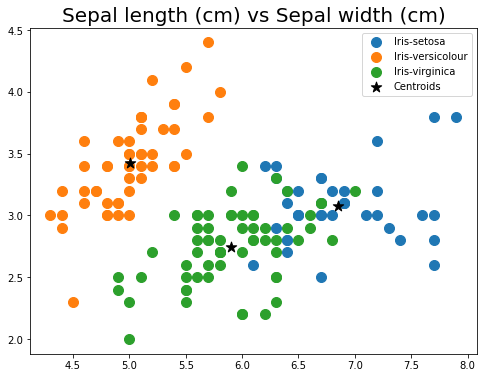

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],label='Iris-setosa',s=100)
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],label='Iris-versicolour',s=100)
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],label='Iris-virginica',s=100)
plt.title('Sepal length (cm) vs Sepal width (cm)',size=20)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=120,label='Centroids',c='black',marker='*')
plt.legend()

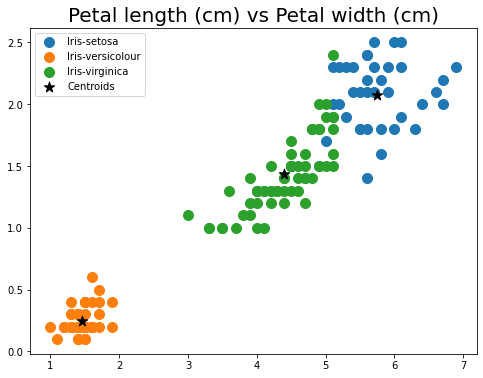

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='Iris-setosa',s=100)
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],label='Iris-versicolour',s=100)
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],label='Iris-virginica',s=100)
plt.title('Petal length (cm) vs Petal width (cm)',size=20)
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],s=120,label='Centroids',c='black',marker='*')
plt.legend()